<h1>Lab 7 - PCA</h1>

<h4>OBJECTIVE</h4>
- To learn dimensionality reduction techniques<br>
- To learn and implement Principal Component Analysis (PCA)

<h4>THEORY</h4>
Dimensionality reduction is a technique used to reduce the number of features or variables in a dataset while retaining as much information as possible. It's widely used in machine learning, data analysis, and visualization to simplify data, remove noise, and improve computational efficiency. Dimensionality reduction is essential because high-dimensional data can be difficult to process, analyze, and visualize effectively. It addresses the "curse of dimensionality," where increased features lead to sparse data and overfitting in machine learning models. <br>
Principal Component Analysis (PCA) is a linear dimensionality reduction technique used to simplify high-dimensional datasets while preserving as much variance (information) as possible. It works by transforming the original features into a new set of orthogonal features, called principal components, which are ranked by the amount of variance they capture.Geometrically, Principal Component Analysis (PCA) transforms the original data into a new coordinate system where the axes, called principal components, represent the directions of maximum variance in the data. These components are orthogonal, ensuring no redundancy, and are ranked by the amount of variance they capture. The first principal component aligns with the direction of the greatest spread of the data, while subsequent components capture decreasing levels of variance, each orthogonal to the previous ones. By projecting data onto these principal components, PCA reduces dimensionality while retaining the most significant features, effectively summarizing the data’s structure in a lower-dimensional space.

Steps involved in PCA are : <br>
1. Center the data 
2. Calculate the covariance matrix
3. Calculate eigenvalues and eigenvectors of the coveriance matrix
4. Order the eigenvectors
5. Calculate the principle components

Principal Component Analysis (PCA) has a wide range of applications across various fields.It allows for 2D or 3D visual representations that make patterns and clusters easier to interpret. In machine learning, PCA serves as a preprocessing step to overfitting. It is extensively used in image compression and signal processing, where large amounts of pixel or signal data are reduced to lower dimensions, preserving key information. In genomics, PCA is applied to analyze gene expression data, helping to identify patterns and similarities between samples. In finance, PCA is used in risk management and portfolio optimization, reducing the complexity of market data while retaining the most significant factors influencing asset returns. PCA aids in speech and audio processing, where it helps extract meaningful features from large sound datasets.

Even with its usefulness, PCA still has limitation. It assumes linearity in the data, which means it may not effectively capture complex, nonlinear relationships. If the data doesnot follow a multidimensional normal (Gaussian) distribution, PCA may not give the best principle components. Additionally, the transformed components lack interpretability, as they are combinations of the original features. PCA also prioritizes variance as the main criterion, which may not always align with the most relevant or meaningful features for a given task. The method is sensitive to feature scaling, requiring data normalization to prevent features with larger scales from dominating. Outliers can distort the results, as they heavily influence the principal components. PCA works best with normally distributed data and may struggle with non-Gaussian distributions.

Q . Image Reconstruction using PCA: In the provided MNIST dataset of handwritten digits, use PCA to perform dimensionality reduction and select top principal components that explain at least (90 + your_roll_number / 12)% variance of data. Then using these selected principal components reconstruct the approximate images data at the data indices your_roll_number, 2 * your_roll_number, 4 * your_roll_number and 8 * your_roll_number.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
data = pd.read_csv('mnist_train_small.csv', header=None)
data_array = data.to_numpy()

In [12]:
labels = data_array[:,0]
images = data_array[:,1:]
labels

array([6, 5, 7, ..., 2, 9, 5], shape=(20000,))

In [13]:
images_mean = np.mean(images, axis=0)
images_centerd = images - images_mean
images_centerd.shape

(20000, 784)

In [17]:
cov_matrix = np.cov(images_centerd, rowvar=False)
print(cov_matrix.shape)

(784, 784)


In [101]:
eigenValues, eigenVectors = np.linalg.eig(cov_matrix)
print("eigenValues Shape : ",eigenValues.shape)
print("eigenVectors Shape : ",eigenVectors.shape)

eigenValues Shape :  (784,)
eigenVectors Shape :  (784, 784)


In [20]:
sorted_indices = np.argsort(eigenValues)[::-1]
sorted_eigenValues = eigenValues[sorted_indices]
sorted_eigenVectors = eigenVectors[:,sorted_indices]

In [22]:
total_variance = np.sum(eigenValues)
variance_ratio = sorted_eigenValues/total_variance

In [37]:
def plot_bar(data, xlabel = '', ylabel = '', title = ''):
    plt.bar(range(1, len(data)+1), data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Nayan Khusu 080BCT048 \n{title}')
    plt.show()
def plot_line(data, xlabel = '', ylabel = '', title = ''):
    plt.plot(range(1, len(data)+1), data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Nayan Khusu 080BCT048 \n{title}')
    plt.grid(True)
    plt.show()

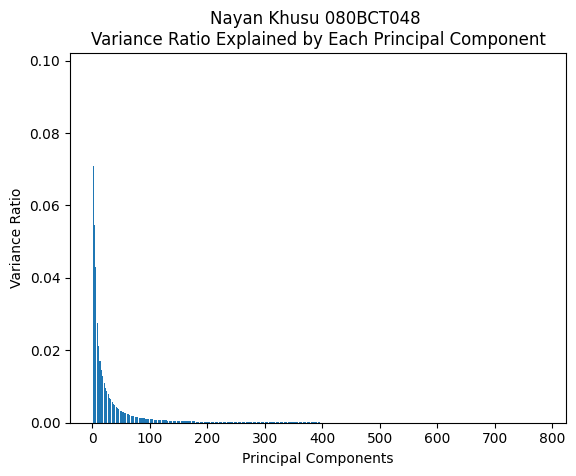

In [33]:
plot_bar(variance_ratio, 'Principal Components', 'Variance Ratio', 'Variance Ratio Explained by Each Principal Component')

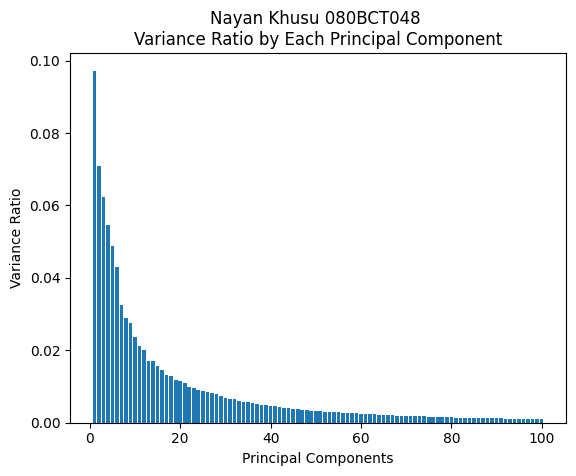

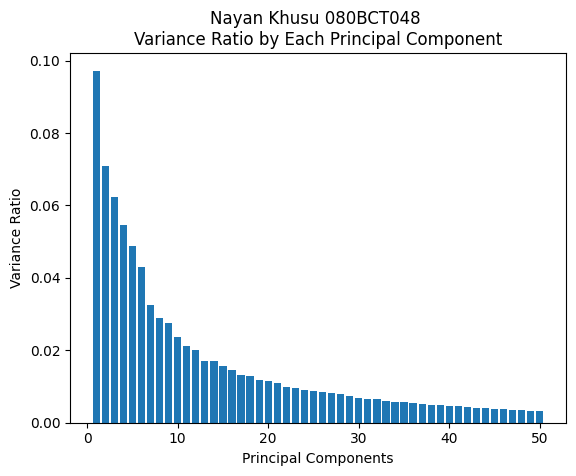

In [39]:
plot_bar(variance_ratio[:100], 'Principal Components', 'Variance Ratio', 'Variance Ratio by Each Principal Component')
plot_bar(variance_ratio[:50], 'Principal Components', 'Variance Ratio', 'Variance Ratio by Each Principal Component')

In [29]:
cumulative_variance_ratio = np.cumsum(variance_ratio)

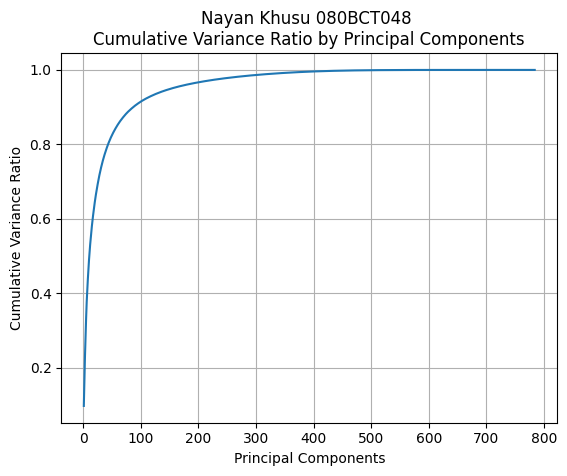

In [41]:
plot_line(cumulative_variance_ratio, 'Principal Components', 'Cumulative Variance Ratio', 'Cumulative Variance Ratio by Principal Components')

/home/nyanko/Documents/Pulchock-BCT/Sem3/DataScienceLab/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/nyanko/Documents/Pulchock-BCT/Sem3/DataScienceLab/.venv/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


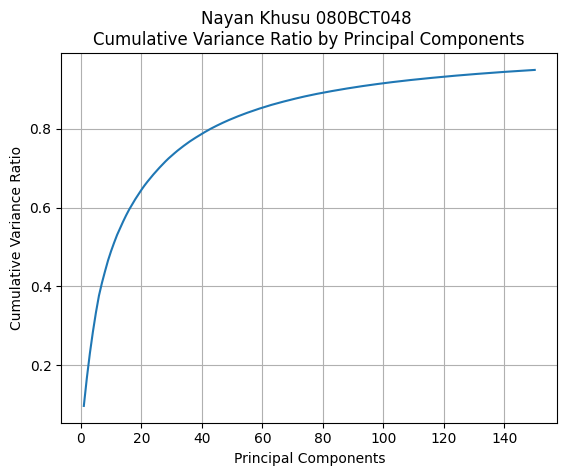

In [51]:
plot_line(cumulative_variance_ratio[:150], 'Principal Components', 'Cumulative Variance Ratio', 'Cumulative Variance Ratio by Principal Components')

In [52]:
roll_number = 48
target_variance = 90 + (roll_number / 12)
num_components = np.argmax(cumulative_variance_ratio >= target_variance / 100) + 1

In [99]:
selected_eigenVectors = sorted_eigenVectors[:, :num_components]
projected_data = np.dot(images_centerd, selected_eigenVectors)

In [60]:
reconstructed_data = np.dot(projected_data, selected_eigenVectors.T) + images_mean

In [64]:
indices = [roll_number, 2 * roll_number, 4 * roll_number, 8 * roll_number]
original_images = images[indices]
reconstructed_images = reconstructed_data[indices]

In [97]:
def plot_images(original, reconstructed, indices):
    num_images = len(indices)
    plt.figure(figsize=(13, 10))
    plt.title('Nayan Khusu 080BCT048')
    plt.axis('off')
    for i, idx in enumerate(indices):

        plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title(f"Original {idx}")
        plt.axis('off')


        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title(f"Reconstructed {idx}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [95]:
reconstructed_images = np.real(reconstructed_images)

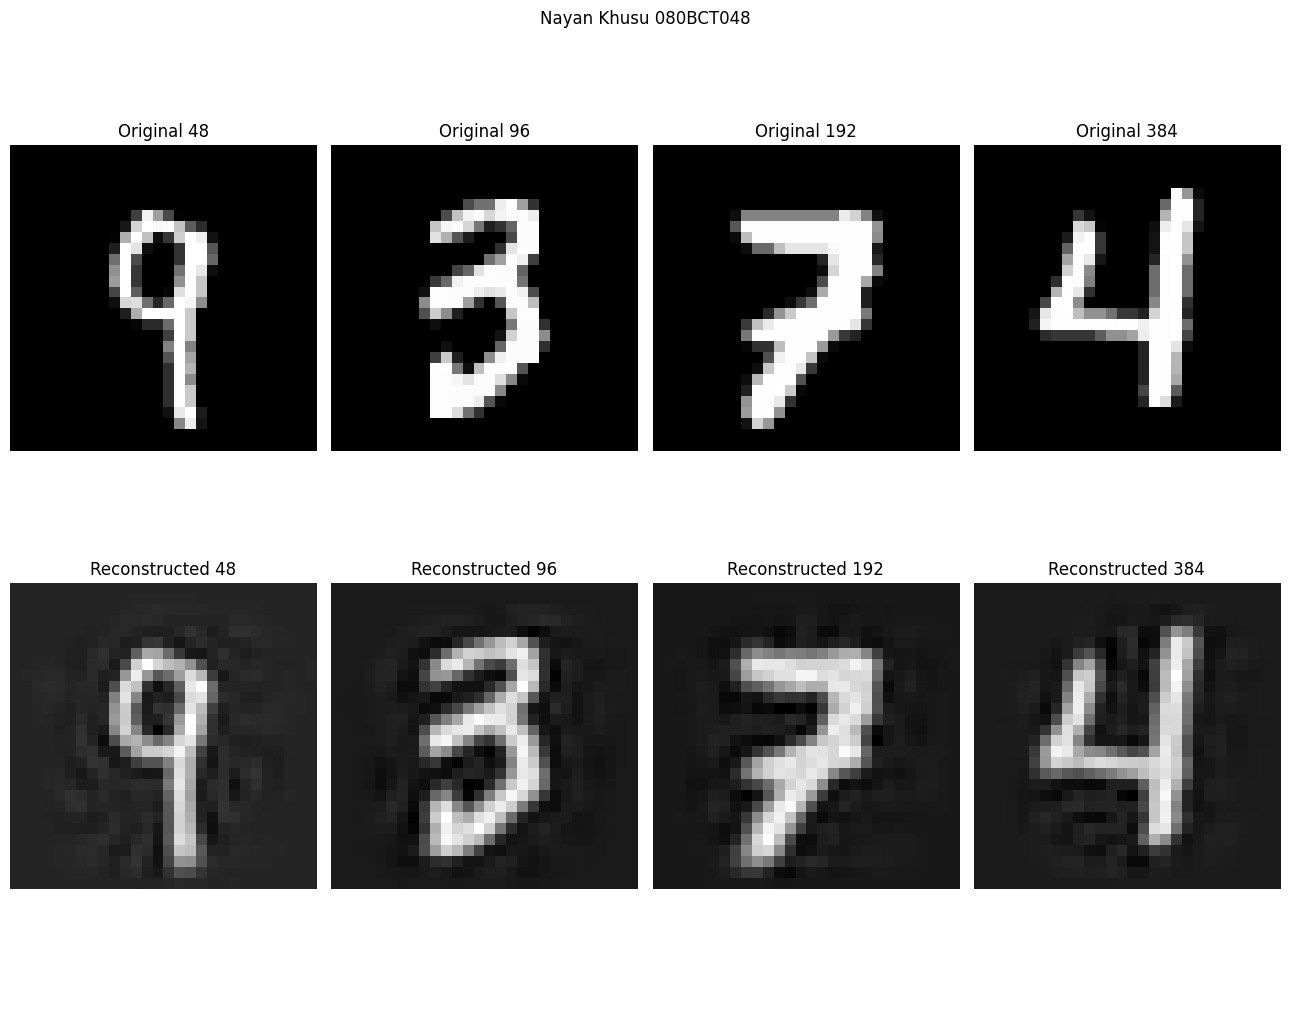

In [98]:
plot_images(original_images, reconstructed_images, indices)

<h4>Discussion</h4>
In this lab, we were introduced to a dimensionality reduction techniques, Principal Component Analysis (PCA). We leraned the process of PCA and how we can implement it to different datasets. We used a dataset for from sklearn.datasets, using the ```from sklearn.datasets import load_iris```. We implemented the PCA in this dataset, reducing the number of dataset from four to two. As a assignment we performed image reconstruction using PCA. This assignment effectively demonstrated the application of PCA for dimensionality reduction and image reconstruction. By reducing the original 784-dimensional feature space (corresponding to 28x28 images) to a smaller number of principal components, 134. For the given dataset the target variance threshold of approximately was 94%. The reconstructed images closely resemble the original ones, validating the effectiveness of PCA in preserving meaningful visual features. like this, we were able to strik a balance between dimensionality reduction and reconstruction quality.

<h4>Conclusion</h4>

Hence, in this lab we were able to learn and implement the Principle Component Analysis. Through the program written we can see the power of PCA for dimensionality reduction, data compression, and exploratory data analysis, highlighting its practical significance in handling high-dimensional datasets. This assignment also emphasizes the trade-off between compression and reconstruction quality; while fewer components enhance compression, they may compromise fidelity.